In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def total_infected(I):
  total = 0;
  for i in range(0, len(I)):
    total = total + I[i]

  print('Total Infected = ', total)

  return total

In [ ]:
def malaria_simulator(uninfected_humans, 
                      initial_human_host, 
                      initial_immune_humans,
                      prob_bit, 
                      recovery_rate, 
                      immunity_rate, 
                      MI_death_rate, 
                      birth_rate, 
                      death_rate,
                      initial_vectors, 
                      uninfected_mosq, 
                      prob_bite,
                      t,
                      dt):
  
  t_arr = np.arange(0, t+dt, dt)
  uih = 0 * t_arr
  hh = 0 * t_arr
  hhd = 0 * t_arr
  hhi = 0 * t_arr
  uim = 0 * t_arr
  uimd = 0 * t_arr
  vec = 0 * t_arr
  vecd = 0 * t_arr
  new_infected = 0 * t_arr

  uih[0] = uninfected_humans
  hh[0] = initial_human_host
  uim[0] = uninfected_mosq
  vec[0] = initial_vectors
  hhi[0] = initial_immune_humans
  new_infected[0] = initial_human_host

  for i in range(1, len(t_arr)):
    uih[i] = uih[i-1] + ((recovery_rate * hh[i-1]) - prob_bit * uih[i-1] * vec[i-1]/(vec[i-1] + uim[i-1])) * dt
    new_infected[i] = (prob_bit * uih[i-1] * vec[i-1]/(vec[i-1] + uim[i-1])) * dt
    # print(new_infected[i])
    hh[i] = hh[i-1] + ((prob_bit * uih[i-1] * vec[i-1]/(vec[i-1] + uim[i-1])) - (recovery_rate + MI_death_rate + immunity_rate)*hh[i-1]) * dt
    hhd[i] = hhd[i-1] + MI_death_rate * hh[i-1] * dt
    hhi[i] = hhi[i-1] + immunity_rate * hh[i-1] * dt
    uim[i] = uim[i-1] + (birth_rate * (uim[i-1] + vec[i-1]) - death_rate * uim[i-1] - prob_bite * uim[i-1] * hh[i-1]/(uih[i-1] + hh[i-1]+ hhi[i-1])) * dt
    uimd[i] = uimd[i-1] + death_rate * uim[i-1] * dt
    vec[i] = vec[i-1] + (prob_bite * uim[i-1] * hh[i-1]/(uih[i-1] + hh[i-1]+hhi[i-1]) - death_rate * vec[i-1]) * dt
    vecd[i] = vecd[i-1] + death_rate * vec[i-1] * dt

  return uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected


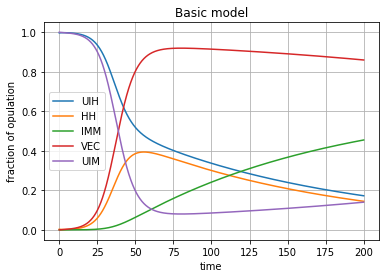

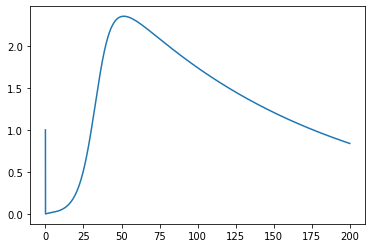

In [ ]:
uninfected_humans = 300
initial_human_host = 1
initial_immune_humans = 0
prob_bit = 0.3
recovery_rate = 0.3
immunity_rate = 0.01
MI_death_rate = 0.005
birth_rate = 0.01
death_rate = 0.01
initial_vectors = 0
uninfected_mosq = 300
prob_bite = 0.3
t = 200
#t = 1500
dt = 0.0625

uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected = malaria_simulator(uninfected_humans, 
                      initial_human_host, 
                      initial_immune_humans,
                      prob_bit, 
                      recovery_rate, 
                      immunity_rate, 
                      MI_death_rate, 
                      birth_rate, 
                      death_rate,
                      initial_vectors, 
                      uninfected_mosq, 
                      prob_bite,
                      t,
                      dt)

plt.figure()
plt.plot(t_arr, uih/(uninfected_humans + initial_human_host))
plt.plot(t_arr, hh/(uninfected_humans + initial_human_host))
plt.plot(t_arr, hhi/(uninfected_humans + initial_human_host))
plt.plot(t_arr, vec/(initial_vectors + uninfected_mosq))
plt.plot(t_arr, uim/(initial_vectors + uninfected_mosq))
plt.xlabel('time')
plt.ylabel('fraction of opulation')
plt.legend(['UIH', 'HH', 'IMM', 'VEC', 'UIM'])
plt.grid()
plt.title('Basic model')
plt.savefig('base.png')

plt.figure()
plt.plot(t_arr, new_infected)

### Effect of Vaccination - Vary immunity rate

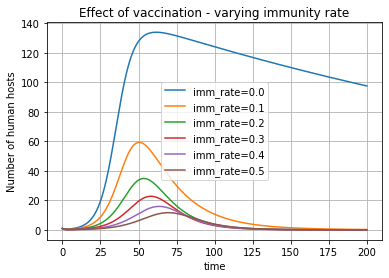

In [ ]:
uninfected_humans = 300
initial_human_host = 1
initial_immune_humans = 0
prob_bit = 0.3
recovery_rate = 0.3
#immunity_rate = 0.01
MI_death_rate = 0.005
birth_rate = 0.01
death_rate = 0.01
initial_vectors = 0
uninfected_mosq = 300
prob_bite = 0.3
t = 200
dt = 0.0625

immunity_rate = np.arange(0, 0.6, 0.1)
plt.figure()
for i in immunity_rate:
    uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected = malaria_simulator(uninfected_humans, 
                        initial_human_host, 
                        initial_immune_humans,
                        prob_bit, 
                        recovery_rate, 
                        i, 
                        MI_death_rate, 
                        birth_rate, 
                        death_rate,
                        initial_vectors, 
                        uninfected_mosq, 
                        prob_bite,
                        t,
                        dt)
    plt.plot(t_arr, hh)

plt.grid()
plt.legend(['imm_rate=0.0','imm_rate=0.1','imm_rate=0.2','imm_rate=0.3','imm_rate=0.4','imm_rate=0.5'])
plt.xlabel('time')
plt.ylabel('Number of human hosts')
plt.title('Effect of vaccination - varying immunity rate')
plt.savefig('vaccination.png')

### Effect of fumigation - Vary death rate of mosquitoes

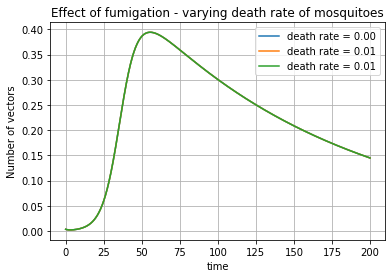

In [ ]:
uninfected_humans = 300
initial_human_host = 1
initial_immune_humans = 0
prob_bit = 0.3
recovery_rate = 0.3
immunity_rate = 0.01
MI_death_rate = 0.005
birth_rate = 0.01
# death_rate = 0.01
initial_vectors = 0
uninfected_mosq = 300
prob_bite = 0.3
t = 200
dt = 0.0625

# death_rate = np.arange(0.01, 0.06, 0.01)/
death_rate = [0.001, 0.005, 0.01]
plt.figure()
for i in death_rate:
    uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected = malaria_simulator(uninfected_humans, 
                        initial_human_host, 
                        initial_immune_humans,
                        prob_bit, 
                        recovery_rate, 
                        immunity_rate, 
                        MI_death_rate, 
                        birth_rate, 
                        i + 0.01,
                        initial_vectors, 
                        uninfected_mosq, 
                        prob_bite,
                        t,
                        dt)
    #plt.plot(t_arr, hh)
    plt.plot(t_arr, hh/(uninfected_humans + initial_human_host))

legend = []
for dr in death_rate:
  legend.append('death rate = ' + "{:.2f}".format(dr))

plt.grid()
plt.legend(legend)
plt.xlabel('time')
plt.ylabel('Number of vectors')
plt.title('Effect of fumigation - varying death rate of mosquitoes')
plt.savefig('')

### Effect of Odomos - vary prob_bit & bite

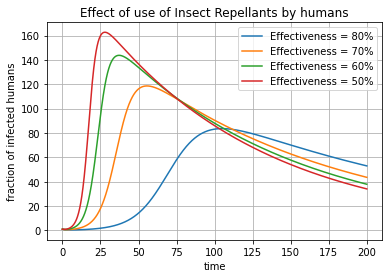

In [ ]:
uninfected_humans = 300
initial_human_host = 1
initial_immune_humans = 0
#prob_bit = 0.3
recovery_rate = 0.3
immunity_rate = 0.01
MI_death_rate = 0.005
birth_rate = 0.01
death_rate = 0.01
initial_vectors = 0
uninfected_mosq = 300
#prob_bite = 0.3
t = 200
dt = 0.0625

prob = np.arange(0.2, 0.6, 0.1)
plt.figure()
for i in prob:
    uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected = malaria_simulator(uninfected_humans, 
                        initial_human_host, 
                        initial_immune_humans,
                        i, 
                        recovery_rate, 
                        immunity_rate, 
                        MI_death_rate, 
                        birth_rate, 
                        death_rate,
                        initial_vectors, 
                        uninfected_mosq, 
                        i,
                        t,
                        dt)
    plt.plot(t_arr, hh)

legend = []
for prb in prob:
  legend.append('Effectiveness = ' + "{:.0f}".format((1-prb)*100) + '%')

plt.grid()
plt.legend(legend)
plt.xlabel('time')
plt.ylabel('fraction of infected humans')
plt.title('Effect of use of Insect Repellants by humans')
plt.savefig('odomos.png')

### Birth rate

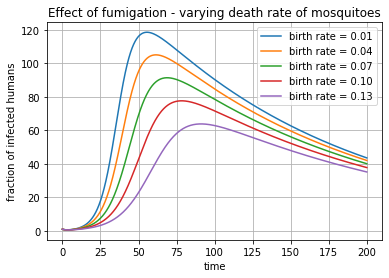

In [ ]:
uninfected_humans = 300
initial_human_host = 1
initial_immune_humans = 0
prob_bit = 0.3
recovery_rate = 0.3
immunity_rate = 0.01
MI_death_rate = 0.005
#birth_rate = 0.01
death_rate = 0.01
initial_vectors = 0
uninfected_mosq = 300
prob_bite = 0.3
t = 200
dt = 0.0625

birth_rate = np.arange(0.01, 0.13, 0.03)
plt.figure()
for i in birth_rate:
    uih, hh, hhd, hhi, uim, uimd, vec, vecd, t_arr, new_infected = malaria_simulator(
                        uninfected_humans, 
                        initial_human_host, 
                        initial_immune_humans,
                        prob_bit, 
                        recovery_rate, 
                        immunity_rate, 
                        MI_death_rate, 
                        i, 
                        death_rate,
                        initial_vectors, 
                        uninfected_mosq, 
                        prob_bite,
                        t,
                        dt)
    #plt.plot(t_arr, hh)
    plt.plot(t_arr, hh)

plt.grid()

legend = []
for br in birth_rate:
  legend.append('birth rate = ' + "{:.2f}".format(br))

plt.legend(legend)
plt.xlabel('time')
plt.ylabel('fraction of infected humans')
plt.title('Effect of fumigation - varying death rate of mosquitoes')
plt.show()

In [ ]:
def shf(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return -delta*sh*im/M + alpha*ih

def ihf(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return -beta*ih - gamma*ih - alpha*ih + delta*sh*im/M

def imhf(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return beta*ih

def smf(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return kappa*M - delta*sm*ih/N - eta*sm - theta*sm

def imf(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return delta*sm*ih/N - eta*im - theta*im

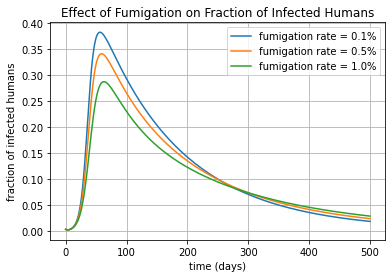

In [ ]:
start_time = 0
end_time = 500
dt = 0.1
n = int((end_time - start_time)/dt)
time = np.arange(start_time,end_time,dt);

Sh = np.zeros(n) 
Ih = np.zeros(n) 
Imh = np.zeros(n) 
Sm = np.zeros(n) 
Im = np.zeros(n) 

Sh[0] = 300
Ih[0] = 1
Imh[0] = 0
Sm[0] = 300
Im[0] = 0

alpha = 0.3
beta = 0.01
gamma = 0.005
kappa = 0.01
delta = 0.3
eta = 0.01
theta = 0.005

theta_values = [0.001,0.005,0.01]

N = Sh[0] + Ih[0] + Imh[0]
M = Sm[0] + Im[0]
for theta in theta_values :
    for i in range(1,len(Sh)):
        Sh[i] = Sh[i-1] + dt*shf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Ih[i] = Ih[i-1] + dt*ihf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Imh[i] = Imh[i-1] + dt*imhf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Sm[i] = Sm[i-1] + dt*smf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Im[i] = Im[i-1] + dt*imf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
    
    plt.plot(time,Ih/N)  

legend = []
for dr in theta_values:
  legend.append('fumigation rate = ' + "{:.1f}".format(dr*100) + '%')

plt.legend(legend)
plt.xlabel('time (days)')
plt.ylabel('fraction of infected humans')
plt.title('Effect of Fumigation on Fraction of Infected Humans');
plt.grid()
plt.savefig('fumigation_inf_humans.png')
plt.show()

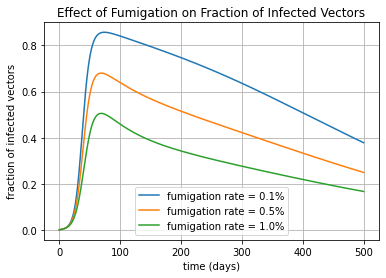

In [ ]:
start_time = 0
end_time = 500
dt = 0.1
n = int((end_time - start_time)/dt)
time = np.arange(start_time,end_time,dt);

Sh = np.zeros(n) 
Ih = np.zeros(n) 
Imh = np.zeros(n) 
Sm = np.zeros(n) 
Im = np.zeros(n) 

Sh[0] = 300
Ih[0] = 1
Imh[0] = 0
Sm[0] = 300
Im[0] = 0

alpha = 0.3
beta = 0.01
gamma = 0.005
kappa = 0.01
delta = 0.3
eta = 0.01
theta = 0.005

theta_values = [0.001,0.005,0.01]

N = Sh[0] + Ih[0] + Imh[0]
M = Sm[0] + Im[0]
for theta in theta_values :
    for i in range(1,len(Sh)):
        Sh[i] = Sh[i-1] + dt*shf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Ih[i] = Ih[i-1] + dt*ihf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Imh[i] = Imh[i-1] + dt*imhf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Sm[i] = Sm[i-1] + dt*smf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Im[i] = Im[i-1] + dt*imf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
    
    plt.plot(time,Im/N)  

legend = []
for dr in theta_values:
  legend.append('fumigation rate = ' + "{:.1f}".format(dr*100) + '%')

plt.legend(legend)
plt.xlabel('time (days)')
plt.ylabel('fraction of infected vectors')
plt.title('Effect of Fumigation on Fraction of Infected Vectors');
plt.grid()
plt.savefig('fumigation_inf_mosquitoes.png')
plt.show()

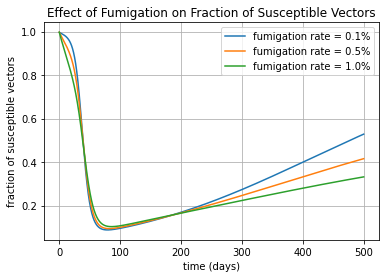

In [ ]:
start_time = 0
end_time = 500
dt = 0.1
n = int((end_time - start_time)/dt)
time = np.arange(start_time,end_time,dt);

Sh = np.zeros(n) 
Ih = np.zeros(n) 
Imh = np.zeros(n) 
Sm = np.zeros(n) 
Im = np.zeros(n) 

Sh[0] = 300
Ih[0] = 1
Imh[0] = 0
Sm[0] = 300
Im[0] = 0

alpha = 0.3
beta = 0.01
gamma = 0.005
kappa = 0.01
delta = 0.3
eta = 0.01
theta = 0.005

theta_values = [0.001,0.005,0.01]

N = Sh[0] + Ih[0] + Imh[0]
M = Sm[0] + Im[0]
for theta in theta_values :
    for i in range(1,len(Sh)):
        Sh[i] = Sh[i-1] + dt*shf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Ih[i] = Ih[i-1] + dt*ihf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Imh[i] = Imh[i-1] + dt*imhf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Sm[i] = Sm[i-1] + dt*smf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Im[i] = Im[i-1] + dt*imf(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
    
    plt.plot(time,Sm/N)  

legend = []
for dr in theta_values:
  legend.append('fumigation rate = ' + "{:.1f}".format(dr*100) + '%')

plt.legend(legend)
plt.xlabel('time (days)')
plt.ylabel('fraction of susceptible vectors')
plt.title('Effect of Fumigation on Fraction of Susceptible Vectors');
plt.grid()
plt.savefig('fumigation_sus_mosquitoes.png')
plt.show()

## Vaccination

In [ ]:
def shv(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return -delta*sh*im/N + alpha*ih - theta*sh

def ihv(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return -beta*ih - gamma*ih - alpha*ih + delta*sh*im/M

def imhv(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return beta*ih + theta*sh

def smv(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return kappa*M - delta*sm*ih/N - eta*sm

def imv(sh,ih,imh,sm,im,alpha,beta,gamma,kappa,delta,eta,N,M,theta):
    return delta*sm*ih/N - eta*im

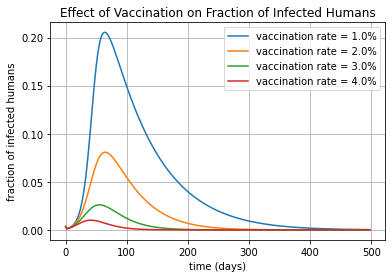

In [ ]:
start_time = 0
end_time = 500
dt = 2
n = int((end_time - start_time)/dt)
time = np.arange(start_time,end_time,dt);

Sh = np.zeros(n) 
Ih = np.zeros(n) 
Imh = np.zeros(n) 
Sm = np.zeros(n) 
Im = np.zeros(n) 

Sh[0] = 300
Ih[0] = 1
Imh[0] = 0
Sm[0] = 300
Im[0] = 0

alpha = 0.3
beta = 0.01
gamma = 0.005
kappa = 0.01
delta = 0.3
eta = 0.01
theta = 0.005

theta_values = [0.01,0.02,0.03,0.04]

N = Sh[0] + Ih[0] + Imh[0]
M = Sm[0] + Im[0]
for theta in theta_values :
    for i in range(1,len(Sh)):
        Sh[i] = Sh[i-1] + dt*shv(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Ih[i] = Ih[i-1] + dt*ihv(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Imh[i] = Imh[i-1] + dt*imhv(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Sm[i] = Sm[i-1] + dt*smv(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)
        Im[i] = Im[i-1] + dt*imv(Sh[i-1],Ih[i-1],Imh[i-1],Sm[i-1],Im[i-1],alpha,beta,gamma,kappa,delta,eta,N,M,theta)

    plt.plot(time, Ih/N)

legend = []
for dr in theta_values:
  legend.append('vaccination rate = ' + "{:.1f}".format(dr*100) + '%')

plt.legend(legend)
plt.xlabel('time (days)')
plt.ylabel('fraction of infected humans')
plt.title('Effect of Vaccination on Fraction of Infected Humans');
plt.grid()
plt.savefig('vaccination_inf_humans.png')
plt.show()